In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path 
df = pd.read_csv("COVID clinical trials.csv")
print(f"Shape:{df.shape}")
df.head(3)

Shape:(5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482


In [2]:
#checking for null values
df.isnull()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5779,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5780,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5781,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [3]:
(df.isnull().mean() * 100).round(1).sort_values(ascending=False).head(20)


Results First Posted       99.4
Study Documents            96.9
Acronym                    57.1
Phases                     42.6
Interventions              15.3
Locations                  10.1
Primary Completion Date     0.6
Study Designs               0.6
Start Date                  0.6
Enrollment                  0.6
Outcome Measures            0.6
Completion Date             0.6
Gender                      0.2
Study Results               0.0
Status                      0.0
NCT Number                  0.0
Rank                        0.0
Title                       0.0
Conditions                  0.0
Sponsor/Collaborators       0.0
dtype: float64

In [4]:
# Drop columns with excessive missing data
drop_cols = ['Results First Posted', 'Study Documents', 'Acronym']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

print("Dropped columns with heavy missing data:", drop_cols)
print("Remaining columns:", df.columns.tolist())


Dropped columns with heavy missing data: ['Results First Posted', 'Study Documents', 'Acronym']
Remaining columns: ['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted', 'Locations', 'URL']


In [5]:
# Numeric columns fill
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns fill
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(f'Missing_{col}', inplace=True)

print("✅ Remaining missing values handled.")


✅ Remaining missing values handled.


/var/folders/7s/ps8hrwbn0hn05mhqg21fcznc0000gn/T/ipykernel_9851/2241036996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/7s/ps8hrwbn0hn05mhqg21fcznc0000gn/T/ipykernel_9851/2241036996.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Status                   5783 non-null   object 
 4   Study Results            5783 non-null   object 
 5   Conditions               5783 non-null   object 
 6   Interventions            5783 non-null   object 
 7   Outcome Measures         5783 non-null   object 
 8   Sponsor/Collaborators    5783 non-null   object 
 9   Gender                   5783 non-null   object 
 10  Age                      5783 non-null   object 
 11  Phases                   5783 non-null   object 
 12  Enrollment               5783 non-null   float64
 13  Funded Bys               5783 non-null   object 
 14  Study Type              

In [7]:
print(df.describe())

              Rank    Enrollment
count  5783.000000  5.783000e+03
mean   2892.000000  1.821278e+04
std    1669.552635  4.033549e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.500000e+02
max    5783.000000  2.000000e+07


In [8]:
print(df.describe(include='object'))

         NCT Number                                        Title      Status  \
count          5783                                         5783        5783   
unique         5783                                         5775          12   
top     NCT04680000  A Study of Ad26.COV2.S in Adults (COVID-19)  Recruiting   
freq              1                                            2        2805   

               Study Results Conditions          Interventions  \
count                   5783       5783                   5783   
unique                     2       3067                   4338   
top     No Results Available   COVID-19  Missing_Interventions   
freq                    5747        720                    886   

                Outcome Measures                    Sponsor/Collaborators  \
count                       5783                                     5783   
unique                      5688                                     3631   
top     Missing_Outcome Measures  Ass

In [9]:
drop_columns=['Acronym', 'Study Documents', 'Results First Posted']
df.drop(columns=drop_cols, inplace=True, errors='ignore')
print("Dropped columns with heavy missing data:", drop_cols)
print()
print("Remaining columns:", df.columns.tolist())

Dropped columns with heavy missing data: ['Results First Posted', 'Study Documents', 'Acronym']

Remaining columns: ['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted', 'Locations', 'URL']


In [10]:
(df.isnull().sum().sort_values(ascending=False).head(10))


Rank                     0
NCT Number               0
Title                    0
Status                   0
Study Results            0
Conditions               0
Interventions            0
Outcome Measures         0
Sponsor/Collaborators    0
Gender                   0
dtype: int64

In [11]:
df.to_csv('cleaned_missing_handled.csv', index=False)
print("Cleaned version saved as cleaned_missing_handled.csv")


Cleaned version saved as cleaned_missing_handled.csv


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

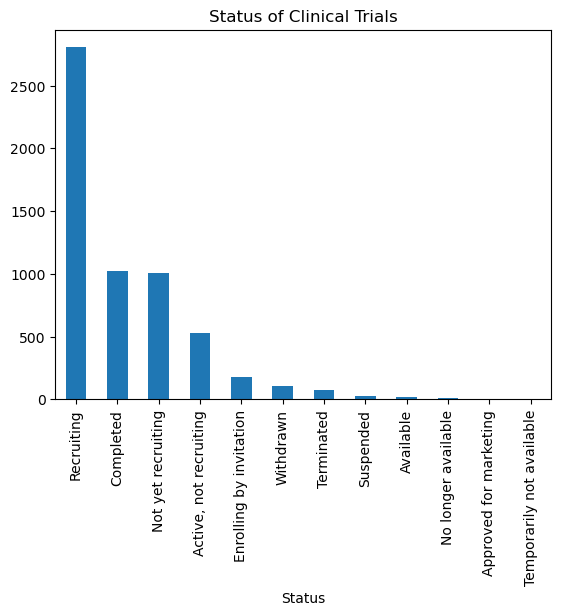

In [12]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Missing_Phases     2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

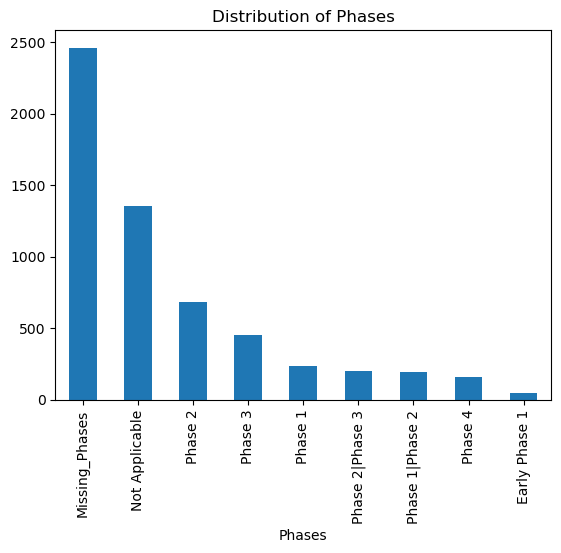

In [13]:
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',title='Distribution of Phases')

Phases                     Early Phase 1  Missing_Phases  Not Applicable  \
Status                                                                     
Active, not recruiting                 7             175             111   
Approved for marketing                 0               2               0   
Available                              0              19               0   
Completed                              3             565             226   
Enrolling by invitation                4              96              54   
No longer available                    0              12               0   
Not yet recruiting                     5             350             282   
Recruiting                            22            1224             647   
Suspended                              2               2               2   
Temporarily not available              0               1               0   
Terminated                             0               4              13   
Withdrawn   

<Axes: title={'center': 'Status vs.Phases'}, xlabel='Status'>

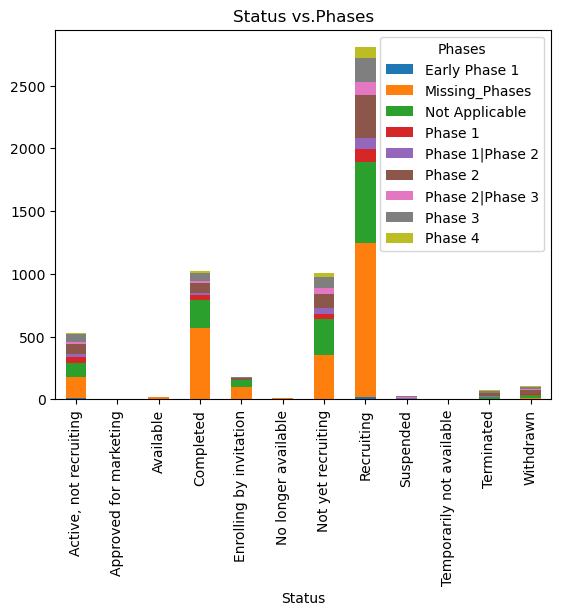

In [14]:
#status v/s phases
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs.Phases')

In [15]:
#Time based analysis
# Common date columns
date_cols = ['Start Date', 'Primary Completion Date', 'Completion Date']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract useful info
df['Start_Year'] = df['Start Date'].dt.year
df['Start_Month'] = df['Start Date'].dt.to_period('M')

print("Date columns converted successfully!")
df[['Start Date', 'Completion Date', 'Start_Year', 'Start_Month']].head(5)


Date columns converted successfully!


,Start Date,Completion Date,Start_Year,Start_Month
0,2020-11-09,2021-04-30,2020.0,2020-11
1,2020-11-02,2021-01-29,2020.0,2020-11
2,2020-05-07,2021-06-15,2020.0,2020-05
3,2020-05-25,2020-08-31,2020.0,2020-05
4,2020-05-05,NaT,2020.0,2020-05


In [16]:
# Fetching countries from the location
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in
range(df.shape[0])]
df['Country'] = countries
print(df['Country'])

0               France
1             Colombia
2           San Marino
3            Hong Kong
4               France
             ...      
5778     United States
5779           Germany
5780     United States
5781           Denmark
5782     United States
Name: Country, Length: 5783, dtype: object


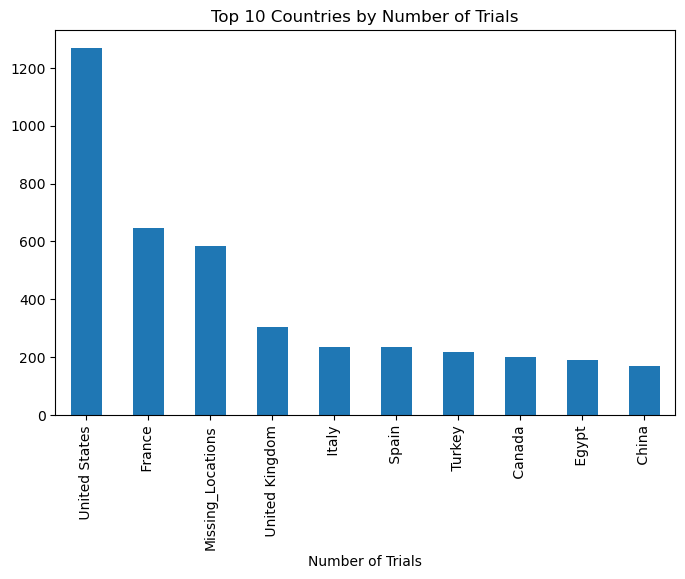

In [17]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(8,5), title='Top 10 Countries by Number of Trials')
plt.xlabel('Number of Trials')
plt.show()


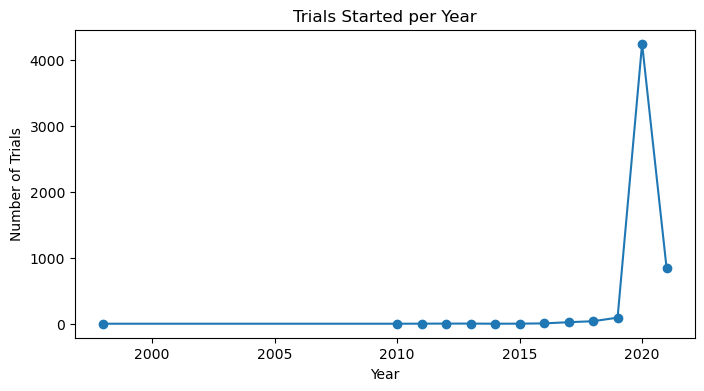

In [18]:
#Trials started per year 
yearly_trials = df['Start_Year'].value_counts().sort_index()
yearly_trials.plot(kind='line', marker='o', figsize=(8,4), title='Trials Started per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trials')
plt.show()


In [19]:
# Convert Enrollment to numeric
df['Enrollment'] = pd.to_numeric(df['Enrollment'], errors='coerce')

# Fill missing enrollments with median
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)

# Create bins (for ML target)
df['Enrollment_bin'] = pd.cut(
    df['Enrollment'],
    bins=[-1, 99, 999, float('inf')],
    labels=['Small', 'Medium', 'Large']
)

print("✅ Enrollment cleaned and binned successfully!")
df[['Enrollment', 'Enrollment_bin']].head(10)


✅ Enrollment cleaned and binned successfully!


/var/folders/7s/ps8hrwbn0hn05mhqg21fcznc0000gn/T/ipykernel_9851/4191690865.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)


,Enrollment,Enrollment_bin
0,1000.0,Large
1,60.0,Small
2,500.0,Medium
3,2500.0,Large
4,50.0,Small
5,10.0,Small
6,200.0,Medium
7,1050.0,Large
8,50.0,Small
9,100.0,Medium


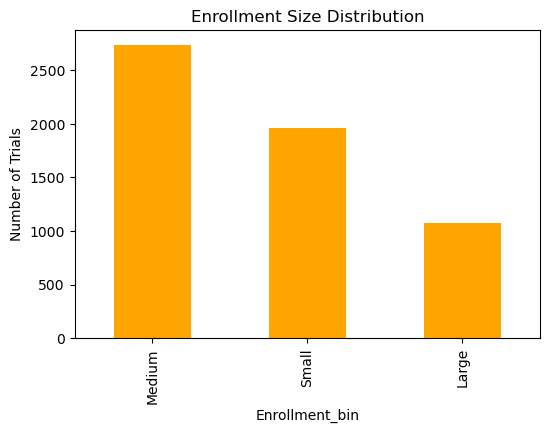

In [20]:
#Distribution of enrollment
enrollment_dist = df['Enrollment_bin'].value_counts()
enrollment_dist.plot(kind='bar', figsize=(6,4), title='Enrollment Size Distribution', color='orange')
plt.ylabel('Number of Trials')
plt.show()


In [21]:
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"the min value is {min_Value}")
print(f"the max value is {min_Value}")
print(f"the mean value is {mean_Value}")
print(f"the median value is {median_Value}")
print(f"the standard value is {std_Value}")

the min value is 0.0
the max value is 0.0
the mean value is 18212.782292927546
the median value is 170.0
the standard value is 403354.93914762075


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [23]:
# Feature columns (inputs)
features = ['Phases', 'Study Type', 'Country']

# Target column (output)
target = 'Enrollment_bin'

# Dataset banayein
df_ml = df.dropna(subset=[target])
X = df_ml[features]
y = df_ml[target]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)
print("✅ Model trained successfully!")


✅ Model trained successfully!


In [30]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Large       0.36      0.08      0.14       216
      Medium       0.51      0.76      0.61       548
       Small       0.56      0.41      0.48       393

    accuracy                           0.52      1157
   macro avg       0.48      0.42      0.41      1157
weighted avg       0.50      0.52      0.48      1157



In [36]:
gender_counts = df.Gender.value_counts()
print(gender_counts)
# visualize_data(gender , caption = 'Gender Distribution' ,ylabel = 'Denisty')

Gender
All       5567
Female     162
Male        44
Name: count, dtype: int64


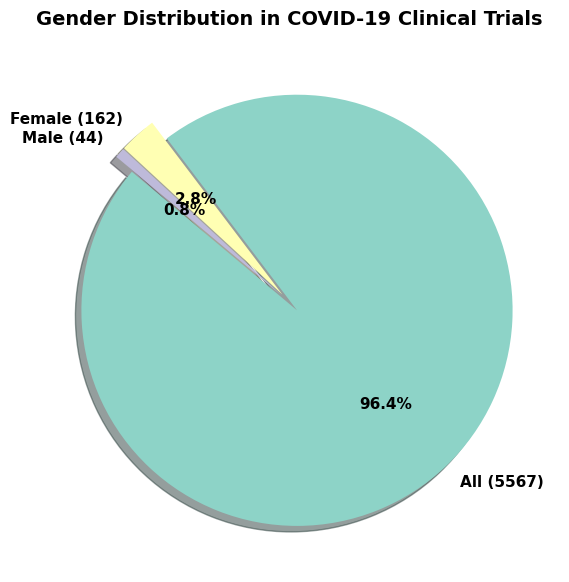

In [38]:
#Visualize gender
explode = [0.05] * len(gender_counts)  # 0.05 = slice separation amount

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(
    gender_counts,
    labels=[f'{label} ({count})' for label, count in zip(gender_counts.index, gender_counts)],
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    shadow=True,
    colors=plt.cm.Set3.colors,
    textprops={'fontsize': 11, 'weight': 'bold'}
)

plt.title('Gender Distribution in COVID-19 Clinical Trials', fontsize=14, fontweight='bold')
plt.show()